# SCI1022 Python Assignment 3: Experimental evaluation of Zipf's law

In this assignment you have to develop code able to evaluate, experimentally, to what extent texts written in natural languages (e.g., English) fulfill the so-called [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law). The law is named after the American linguist [George Kingsley Zipf](https://en.wikipedia.org/wiki/George_Kingsley_Zipf), who studied statistical occurrences in different languages. 

## Zipf's law statement

Zipf's law describes a relationship among **ranks** and **frequencies** of words in natural languages. Given a sample text (e.g., a book), and a word within the text, the **frequency** of the word is defined as the number of occurrences of the word within the text. The **rank** of a word is defined as the position of the word in a ranking of words by frequency (in descending order). Thus, the most common word, i.e., the one with highest frequency, has rank 1, the second most common word has rank 2, and so on. 

If we denote by $r$ the rank of a word, and by $f$ its frequency, then, accordingly to Zipf's law, we have that:

$f(r)=cr^{-s}$,

where $c$ and $s$ are parameters which depend on the particular text and language. It turns out that, for most texts and languages, $s$ is (almost) $1$, i.e.,  $f$ is (almost) inversely proportional to $r$. This means that the frequency of word with rank 2 will be approximately half the one of the most common word, the one with rank 4 approximately a factor of 4 smaller, and so on. **In words, Zipf's law states that only a few words are used very often, while many or most are used rarely.**

Although Zipf's law was first observed empirically in the field of quantitative linguistics, the same relationship occurs in many other rankings of human created systems, such as the ranks of mathematical expressions or ranks of notes in music, and even in uncontrolled environments, such as the population ranks of cities in various countries, corporation sizes, income rankings, among others. 

## Plotting rank-frequency curves

In order to evaluate in a plot whether a measured rank-frequency relationship actually follows Zipf's law, it helps to take the base 10 logarithm on both sides of the equation above, leading to:

$\mathrm{log}_{10}(f(r))=\mathrm{log}_{10}(cr^{-s})=\mathrm{log}_{10}(c)-s\mathrm{log}_{10}(r)$.

Thus, if we rename $y=\mathrm{log}_{10}(f(r))$ and $x=\mathrm{log}_{10}(r)$, and plot $y$ versus $x$, then we should get a straight line with slope $-s$ and intercept $\mathrm{log}_{10}(c)$. (Recall that the general equation of a straight-line $y=g(x)$ is $y=n+mx$, where $n$ is the intercept and $m$ is the slope.)


## Texts subject to analysis. File format explained

We will analyze four different classic books written in English, namely:
 * From the Earth to the Moon, by Jules Verne
 * Time Machine, by Herbert George Wells
 * The Picture of Dorian Gray, by Oscar Wilde
 * The Adventures of Sherlock Holmes, by Arthur Conan Doyle 

The source of these books will be [Project Gutenberg](https://www.gutenberg.org/), an electronic library with more than 60,000 Ebooks (at the date of writing). Project Gutenberg's library only includes "public domain" works that are out of copyright. You will find the pure text file (ASCII) corresponding to each of the four books in a folder available at the Moodle page of the unit. **You have to download these files in the same folder of your system where you downloaded this notebook.**

As usual, before writing code to read a text file, you must know the format of the file. The file format of Project Gutenberg's plain text Ebooks is actually very simple. There are three sections in sequence: header, body, and tail. **The body contains the actual text of the book.** Thus, we must skip the contents of the header and the tail in our analysis. To this end, the header and body are separated by a line which starts with the string `"*** START OF THIS"`, while the body and the tail, are separated by a line which starts with the string `"*** END OF THIS"`. At this point, you are highly encouraged to open, in a text editor (e.g., Notepad in Windows, or TextEdit in MacOSx), the books that you downloaded, in order to double check that this indeed the format.

## A frequency table, main program data structure

The main data structure of the code that you have to write is a frequency table. A frequency table is built out of a given text.  It is a data structure which, given a word, provides its frequency in the text. The first big decision to be made in this assignment is: which is the most appropriate Python data structure to store the frequency table?  An appropriate data structure should let you efficiently add new elements to the table in a dynamic way (this excludes NumPy arrays), and also should be able to provide the frequency associated to a word in time independent on the number of elements of the table (this excludes lists).  

><span style="color:red">**Task 1 (2/22 points).**</span> Write a function that given an already opened file object, modifies the file object such that the file object is positioned in the first line of the body of the book. The function is though not to be a fruitful function, i.e., it does not return a value. **Hint**: you may consider the `startswith` method of type `str` in order to solve this task. (Recall that you can ask for help calling `help(str.startswith)` on a code cell.)
>
>
><span style="color:red">**Task 2 (4/22 points).**</span> Write a function that given a line in the body of the Ebook (as a string), and the frequency table, processes the line and updates the frequency table conformally with the contents of the line. The function is though not to be a fruitful function, i.e., it does not return a value.
> Some hints and considerations:
>  * Before splitting the line in words, replace hyphens (i.e., `"-"`) by blank spaces (i.e., `" "`). You may consider useful to  use the `replace` method of type `str`. 
>  * After splitting the line in words, the resulting words may have leading and/or trailing punctuation signs or blank spaces. The `string` module provides the `punctuation` variable, which contains all English punctuation signs. Figure out how you can use the `strip` method of `str` and such a variable in order to get rid of the leading and/or trailing punctuation signs in each word.
>  * We will neglect [the case of letters](https://en.wikipedia.org/wiki/Letter_case) in our analysis. Thus, for example, we will consider "The" and "the" to be the same word. Thus, before accessing the table, you must transform all letters of the word into lower case.  Figure out how the `lower` method of `str` can be helpful for such purpose.
>
><span style="color:red">**Task 3 (4/22 points).**</span> Write a function that given a file's name of a plain text Gutenberg's Ebook, returns its associated frequency table. The function MUST use the functions written in Task 1 & 2.
>
><span style="color:red">**Task 4 (4/22 points).**</span> Write a function that given a frequency table, returns a list of `(frequency,word)` pairs (i.e., `tuples` of two elements) in descending order by `frequency`. Write in a text cell the answer to the following questions: Which are the top-3 words and associated frequencies in the four books subject of study? Describe in your own words how does the frequency decay with rank for the words in the top-3. **Hint: you may consider the `sort` method of type `list` in order to solve this task. (Recall that you can ask for help calling `help(list.sort)` on a code cell.)**
>
><span style="color:red">**Task 5 (2/22 points).**</span> Write a function that given the list generated in Task 4, returns two lists with `log10(rank)` and `log10(frequency)`, respectively, for all words in the text. 
>
><span style="color:red">**Task 6 (2/22 points).**</span> Write a function that given a list of frequency tables, and a list of labels (strings) with as many labels as tables, generates a plot of `log10(rank)` versus `log10(frequency)` for each of the frequency tables in the list. The curves in the plot must be labeled as given in the second argument. Note that thanks to the `log10`-trick, we do not need a log-log scale plot, i.e., linear scale suffices for both axes.
> Use meaningful labels for the x-, y-axis and the title of the plot. **Hint:** You may consider useful to adapt the plot statements given in the Jupyter notebook of Assignment 2 to solve this task. 
>
><span style="color:red">**Task 7 (2/22 points).**</span> In order to help you out in determining to which extent the curves obtained in Task 6 fulfill Zipf's law, modify the function in Task 6 such that it additionally draws several straight lines with different slopes (i.e., values of $s$), e.g., `-1`, `-1.2`, `-1.5`, `-2`, and intercept equal to `2`. 
>
><span style="color:red">**Task 8 (2/22 points).**</span> Discuss with your own words in a text cell the plot generated using the function obtained in Task 7. Which is the value of `s` among the ones evaluated that best fits the measurements for each of the books. Overall, would you say that the general trend observed for the books subject of study satisfy Zipf's law? Include any observation that you consider relevant to your answer.

In [1]:
# Solution to Task 1 goes here
def skipintro(fin):
    """
    Input: An already open file object. Skips to the part where the official start of the book is so that the publishers 
    notes are not included in the data. 
    
    Output: Python reads the lines from the official start of the ebook.
    """
    for line in fin:
        if line.startswith("*** START OF THIS PROJECT"):
            break

In [2]:
# Solution to Task 2 goes here
import string
def frequency(line, d):
    """
    Input: A lines from an open file object and empty or non-empty dictionary.
    
    Output: Appends a dictionary with the frequency of the words used in a single line in the ebook but does not display
    the new dictionary.
    """
    if line.startswith("*** END OF THIS"):
        return
    line = line.replace("-", " ")
    words = line.strip().split()
    for word in words:
        word = word.strip(string.punctuation)
        word = word.lower()
        if word not in d:
            d[word] = 1
        else:
            d[word] += 1
    return

In [3]:
# Solution to Task 3 goes here
def generatefrequencytable(text):
    """
    Input: An object file.
    
    Output: Generates a frequency table containing the words in the object file and the amount of times the words have been
    used in the type dictionary.
    """
    frequencytable = {}
    fin = open(text,"r")
    skipintro(fin)
    lines = fin.readlines()
    for line in lines:
        frequency(line,frequencytable)
    fin.close()
    return frequencytable

In [4]:
# Solution to Task 4 goes here
def sort(frequencytable):
    """
    Input: Frequency table of type dictionary.
    
    Output: A list containing the entries of the dictionaries in tuples in descending order.
    """
    lst = [(frequencytable[word],word) for word in frequencytable]
    lst.sort(reverse = True)
    return lst

<span style="color:red">**Write your answers to the questions in Task 4 in this cell.**</span>

We can see that "the" is the most used word in "adventures.txt" and that its almost double the second most used word "and".
The third most used word is "i" and it is very close to the value of the second most used word. This pattern seems to
continue.

In [5]:
# Solution to Task 5 goes here
import math
def ln(lst):
    """
    Input: A list of pairs of tuples with their frequency and adjacent word in descending order.

    Output: Two lists of log10(rank) (i.e., the poistion of the word in descending order) and log10(frequency).
    """
    rank = 0
    ranklst = []
    freqlst = []
    for i in range(0, len(lst)):
        rank += 1
        ranklst.append(rank)
        freqlst.append(lst[i][0])
    for num in range(len(ranklst)):
        ranklst[num] = math.log10(ranklst[num])
        freqlst[num] = math.log10(freqlst[num])
    return ranklst, freqlst

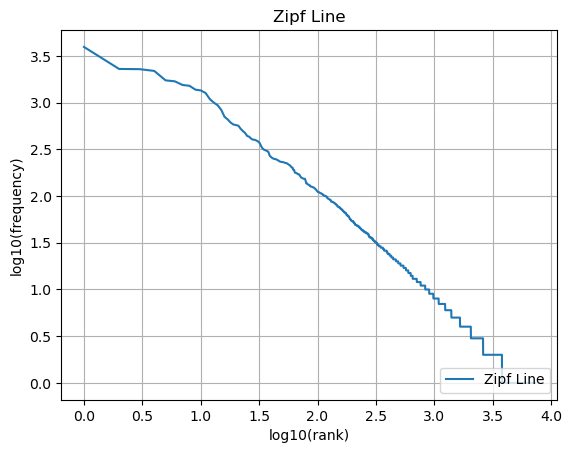

In [6]:
# Solution to Task 6 goes here
import matplotlib.pyplot as plt
def plotzipfs(rank,freqlst):
    """
    Input: Two lists of log10(rank) and log10(frequency).
    
    Output: A plot showing the relationship of log10(rank), (x-axis), against log10(frequency), (y-axis).
    """
    plt.plot(rank, freqlst,label="Zipf Line")
    plt.title('Zipf Line')
    plt.rcParams['legend.loc']='lower right'
    plt.xlabel('log10(rank)')
    plt.ylabel('log10(frequency)')
    plt.legend()
    plt.yscale('linear')
    plt.grid()
    plt.show()
    return

#Example using "picture.txt"
rank, freqlst = ln(sort(generatefrequencytable("picture.txt")))

#Execute the function
plotzipfs(rank, freqlst)

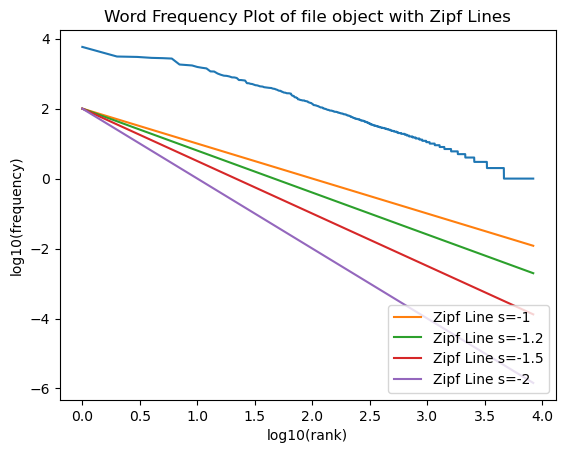

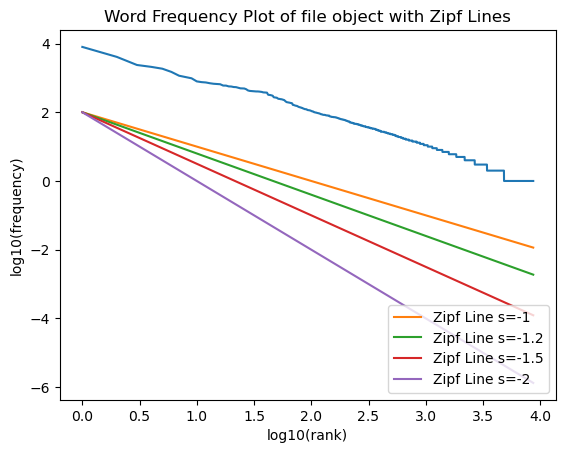

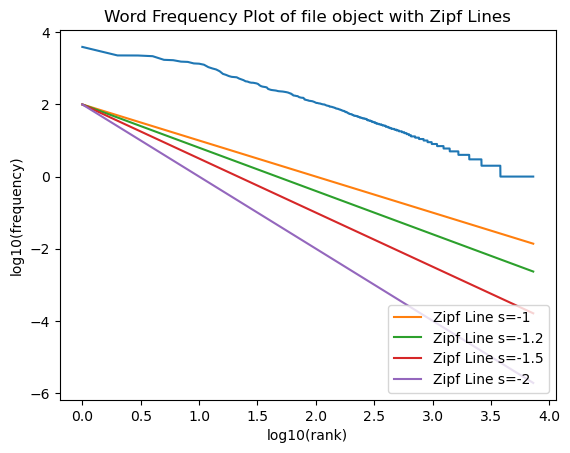

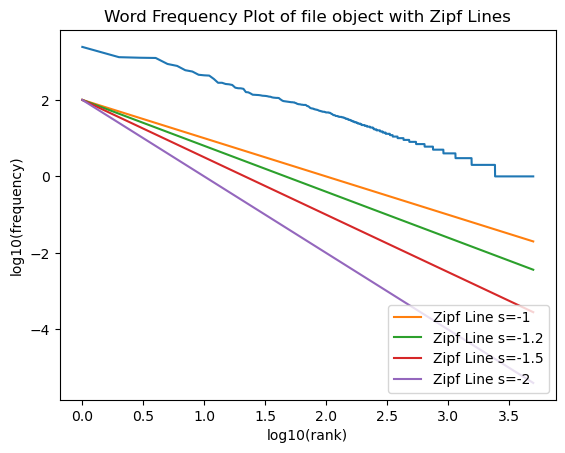

In [7]:
# Solution to Task 7 goes here
def plotlinear(rank,freqlst):
    """
    Input: Two lists of log10(rank) and log10(frequency).
    
    Output: A plot showing the relationship of log10(rank) against log10(frequency) with a linear line of negative slopes
    -1, -1.2, -1.5 and -2 at intercept of the maximum frequency.
    """
    zipfs, lin = plt.subplots()
    lin.set_xlabel('log10(rank)')
    lin.set_ylabel('log10(frequency)')
    lin.set_title('Word Frequency Plot of file object with Zipf Lines')
    lin.plot(rank, freqlst)
    s_values = [-1, -1.2, -1.5, -2]
    intercept = 2
    for s in s_values:
        y = [s * x + intercept for x in rank]
        lin.plot(rank, y, label='Zipf Line s={}'.format(s))
    lin.legend()
    plt.show()
    return

#Assigning name of books
Adventures = "adventures.txt" #Plot 1
Earth_to_moon = "earth_to_moon.txt" #Plot 2
Picture = "picture.txt" #Plot 3
Time_machine = "time_machine.txt" #Plot 4

#Assigning each book in order.
rank1, freqlst1 = ln(sort(generatefrequencytable(Adventures)))
rank2, freqlst2 = ln(sort(generatefrequencytable(Earth_to_moon)))
rank3, freqlst3 = ln(sort(generatefrequencytable(Picture)))
rank4, freqlst4 = ln(sort(generatefrequencytable(Time_machine)))

#Plotting each book in order.
plotlinear(rank1,freqlst1)
plotlinear(rank2,freqlst2)
plotlinear(rank3,freqlst3)
plotlinear(rank4,freqlst4)

<span style="color:red">**Write your answers to the questions in Task 8 in this cell.**</span>

The graph became easier to compare gradients when setting the intercept equal to the maximum log10(rank), however this is not displayed. Though, it appears that all the curves are in agreement with the gradient -1, as they all have a similar starting point and decrease at a similar rate. The text "Earth to Moon" has the greatest agreement with the gradient -1, suggesting that it contains the most diverse vocabulary. The data shows that the texts "Adventures" and "Picture" use more of the same words. This data supports Zipf's law and as mentioned at the beginning of this document, the average gradient (s) is 1, which is in agreement with the data here. It can be observed that the graph usually starts with a plateau, then decreases until it becomes somewhat smooth, and finally shows a strange zigzag pattern. As the frequency of ln(5), ln(4), ln(3), and so on decreases, the results become more homogeneous, which explains the zigzag pattern.